In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

df = pd.read_csv('./data/chem_lab.csv')
df = df[['ID', 'Total']]
df['code'] = df['ID'].str[4:6]
df = df.rename(columns={'Total': 'Marks'})

df

,ID,Marks,code
0,2022A1PS0984P,165.0,A1
1,2022A1PS1075P,150.0,A1
2,2022A1PS1149P,162.0,A1
3,2022A2PS1076P,154.5,A2
4,2022A2PS1092P,148.0,A2
...,...,...,...
1181,2022B5PS0672P,142.0,B5
1182,2022B5PS0783P,169.5,B5
1183,2022B5PS0952P,116.0,B5
1184,2022B5PS1054P,134.0,B5


In [30]:
max_marks = 200
name = 'Chem Lab'

Text(0.5, 1.0, 'Marks Distribution for Chem Lab')

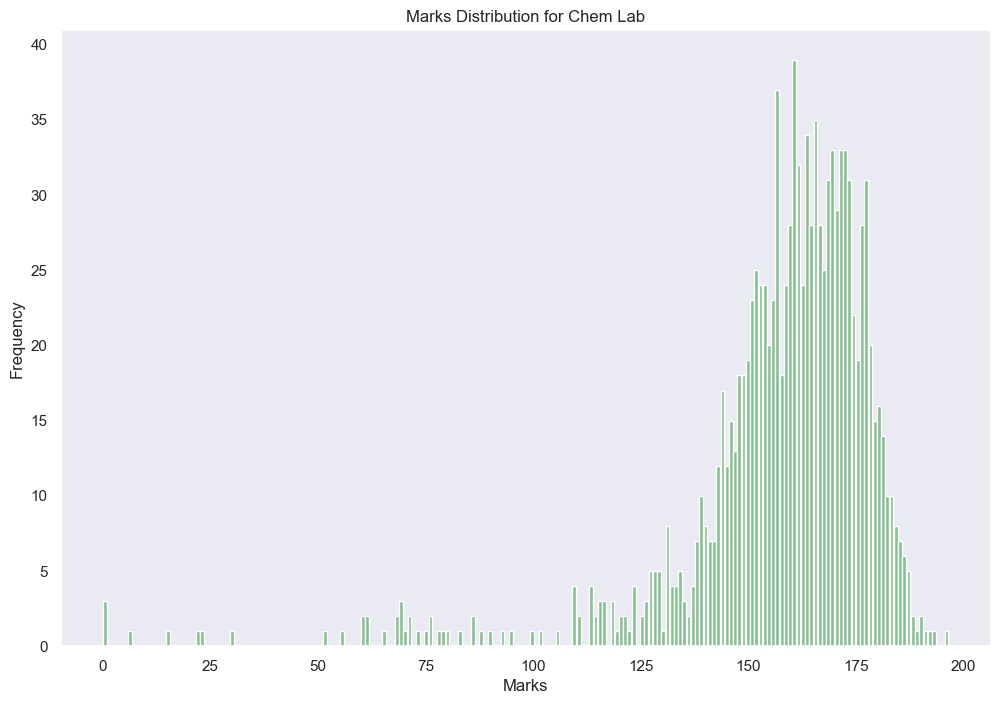

In [42]:
df.hist(column='Marks',bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Marks Distribution for ' + name)

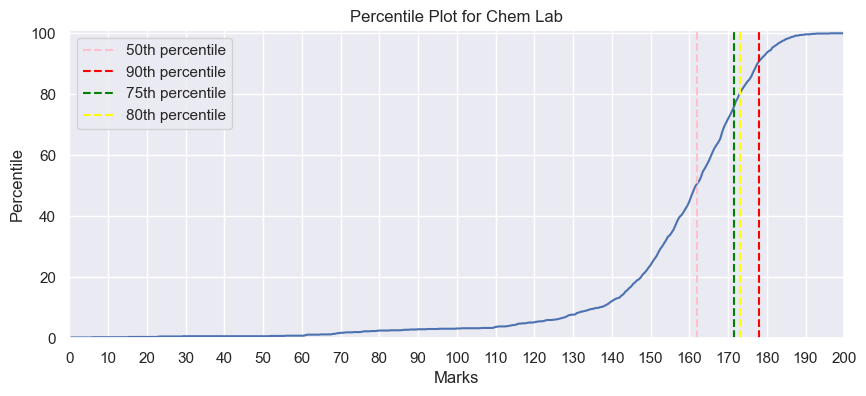

In [33]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,4))
fun = lambda k: [i/k for i in list(range(1, max_marks*k + 1))]

a = fun(2)
b = [stats.percentileofscore(df["Marks"],i, kind='weak') for i in a]
ax.plot(a, b)

plt.axvline(x=df['Marks'].quantile([0.5]).values[0], color='pink', linestyle='--', label='50th percentile')
plt.axvline(x=df['Marks'].quantile([0.9]).values[0], color='red', linestyle='--', label='90th percentile')
plt.axvline(x=df['Marks'].quantile([0.75]).values[0], color='green', linestyle='--', label='75th percentile')
plt.axvline(x=df['Marks'].quantile([0.8]).values[0], color='yellow', linestyle='--', label='80th percentile')



ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_ylim(0,101)
ax.set_xlim(0,max_marks)
ax.set_xlabel("Marks")
ax.set_ylabel("Percentile")
ax.set_title("Percentile Plot for " + name)
ax.legend()
plt.show()

Text(0.5, 1.0, 'Quartiles for Chem Lab')

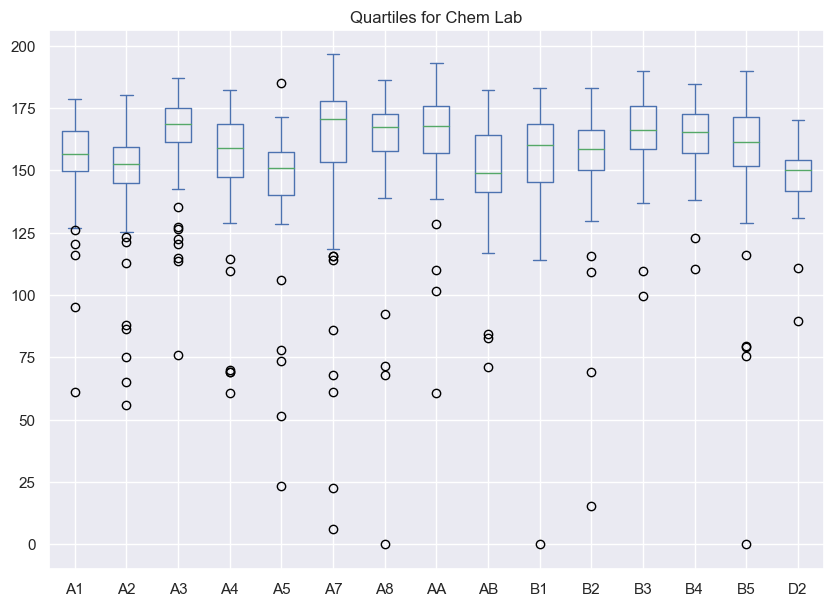

In [34]:
pivot = df.pivot_table(index="ID", columns='code', values='Marks')
pivot.plot(kind='box', figsize=(10, 7))
plt.title('Quartiles for ' + name)

In [12]:
print(f"Mean: {df['Marks'].mean()}")
print(f"Median: {df['Marks'].median()}")

Mean: 157.4877554222597
Median: 161.979195


In [26]:
print(f"Mean: {df[df['code'] == 'A3']['Marks'].median()}")
print(f"Mean: {df[df['code'] == 'B3']['Marks'].median()}")

Mean: 168.5
Mean: 165.997312


In [13]:
for i in range(170, 190):
    print(f"marks: {i} -> {stats.percentileofscore(df['Marks'], i, kind='weak')}")

marks: 170 -> 71.92242833052278
marks: 171 -> 74.36762225969646
marks: 172 -> 77.57166947723441
marks: 173 -> 80.18549747048904
marks: 174 -> 82.29342327150084
marks: 175 -> 84.14839797639124
marks: 176 -> 85.83473861720068
marks: 177 -> 88.53288364249579
marks: 178 -> 90.80944350758854
marks: 179 -> 92.24283305227657
marks: 180 -> 93.59190556492412
marks: 181 -> 94.43507588532884
marks: 182 -> 95.7841483979764
marks: 183 -> 96.71163575042159
marks: 184 -> 97.47048903878584
marks: 185 -> 98.14502529510962
marks: 186 -> 98.56661045531197
marks: 187 -> 98.98819561551434
marks: 188 -> 99.24114671163576
marks: 189 -> 99.49409780775717


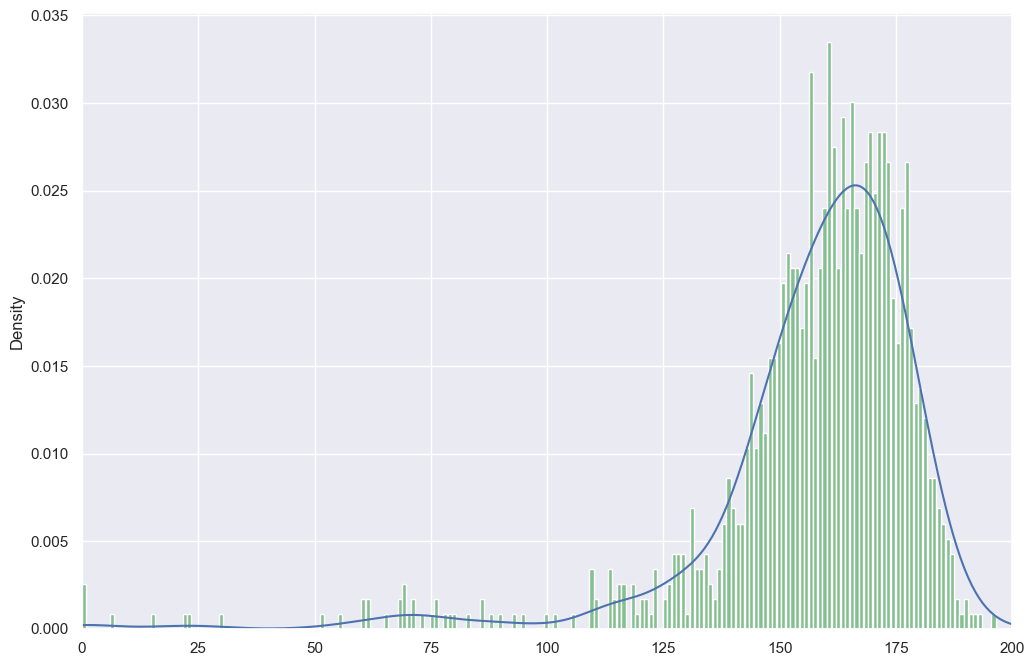

In [14]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", density=True, bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df['Marks'].plot(kind = "kde", ax=ax)
ax.set_xlim(0, max_marks)
plt.show()

In [15]:
a7_df = df[df['code'] == 'A7']
a7_df

,ID,Marks,code
17,2022A7PS0144P,184.500000,A7
73,2022A7PS0033P,164.000000,A7
74,2022A7PS0036P,170.998208,A7
75,2022A7PS0076P,153.500000,A7
76,2022A7PS0097P,182.498208,A7
...,...,...,...
1160,2022A7PS0091P,177.500000,A7
1161,2022A7PS0092P,68.000000,A7
1162,2022A7PS0156P,125.000000,A7
1163,2022A7PS1174P,171.500000,A7


array([[<AxesSubplot:title={'center':'Marks'}>]], dtype=object)

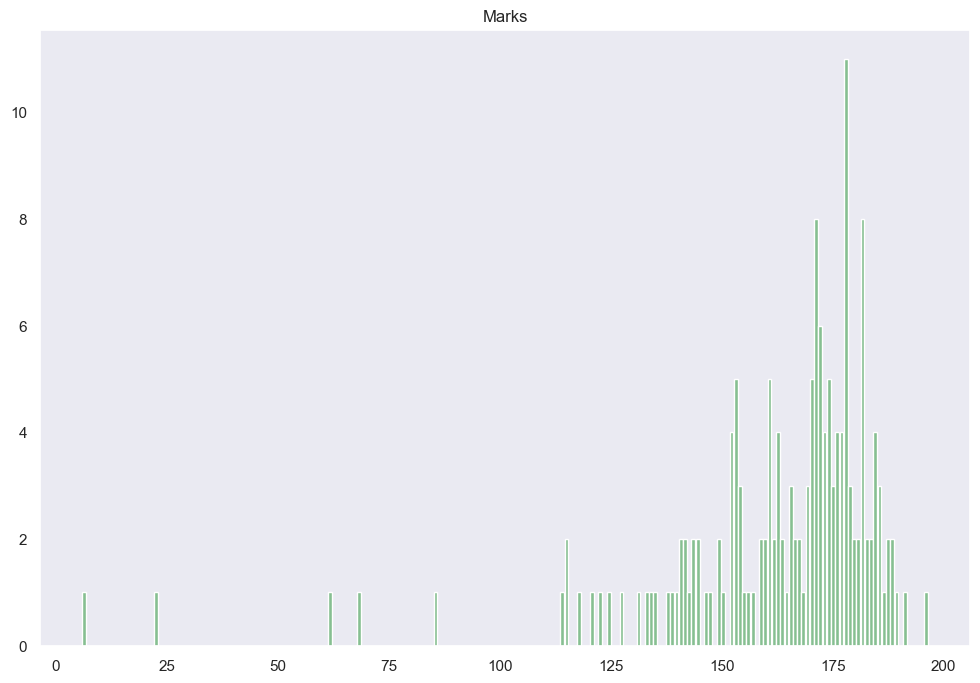

In [16]:
a7_df.hist(column='Marks',bins=max_marks, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [17]:
print(a7_df['Marks'].mean())
print(a7_df['Marks'].median())


161.7569700388889
170.4820145


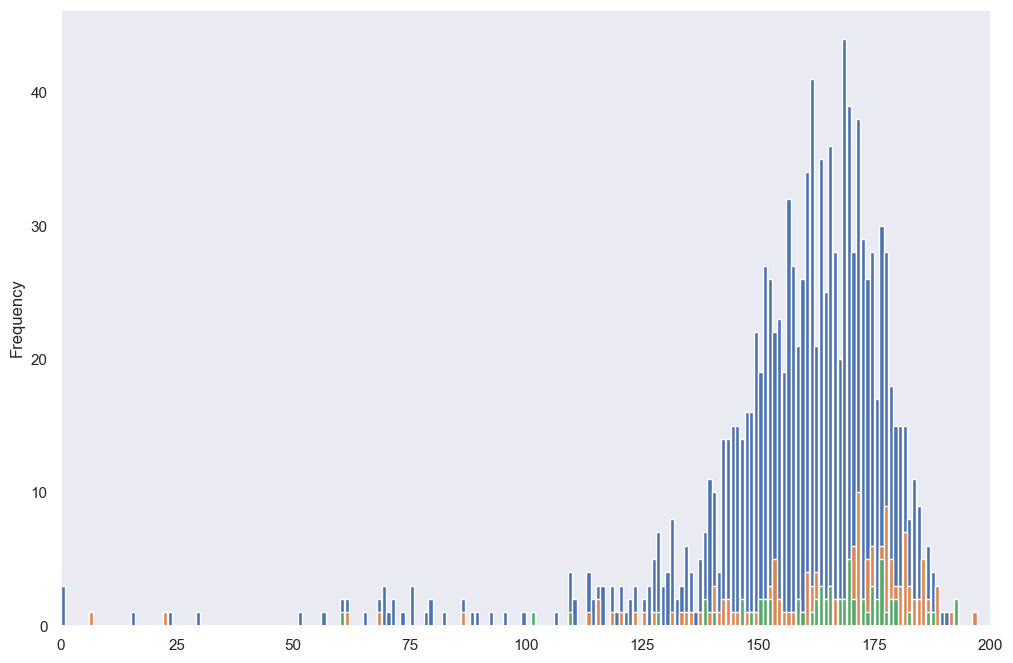

In [19]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9, label='All')
a7_df['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9, label='A7')
df[df['code'] == 'AA']['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9, label='AA')
ax.set_xlim(0, max_marks)
plt.show()